### Clustering: 
- Group objects into clusers such that objects in each group are more similar.
- Main applications:
  - pattern recognition
  - image analysis
  - information retrivial
  - bioinformatics
  - data compression
  - computer graphics
  - machine learning
- Mathematically, clustering task is formulated as multi-objective optimization problem.
- There are various algorithms for clustering, the choose of any algorithm depends on data set and the intended use of results.
- Other terms for clustering: Automatic classification, typological analysis, community detection
#### Some definitions:
- Hard clustering vs Soft clustering: 
  - Hard (strict partitionong): each data point exactly belongs to one cluster
  - Soft (fuzzy, overlapping clutering): each data point belongs to any cluster to some extent 9a liklihood belonging of clusters)
  
- Cluster modeling:
  - connectivity models
  - centroid based
  - distribution based
  - density based
  - graph based -
  - and many more

### Clustering algorithms implemeted in sklearn.
- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians

### Creating a synthetic dataset wth 2 classes:


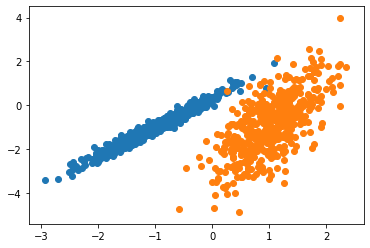

In [47]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn import cluster, datasets, mixture
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## K-Means:
- Centroid based algorithm, aims to partition data points into k (arbitrary) number of clusters where each datum belongs to a cluster with nearest mean.
- Centroids (center of clusters) serve as prototype of clusters.
- The K-means algorithm aims to choose centroids that minimise the inertia: or within-cluster sum-of-squares criterion
- it is a NP hard optimization problem to solve, so approximation algorithm is implemented which canbe seen as a variation of expectation maximization algorithm.
- As approximation algorithm is implemented (heuristic), a) no global solution is guaranteed, b)several runs of algorithm is requiered for best result c) initialization is important (init='k-means++' in sklearn initialize smarter than random).
- In summary, the steps of algorithm are: 
  - 1) select k, 
  - 2) select random centroids
  - 3) measure distance between any datum and centroids and assign it to the nearest centroid 
  - 4) update cluster centroid (mean for k-mean,  median for kmedian also called k-medoid (median only makes sense in 1D)

- kmedian: (Better called kmedoid) chooses data points as centers (medoids or exemplars) 
It is more robust to noise and outliers as compared to k-means because it minimizes a sum of pairwise dissimilarities instead of a sum of squared Euclidean distances. 
A medoid can be defined as the object of a cluster whose average dissimilarity to all the objects in the cluster is minimal, that is, it is a most centrally located point in the cluster.

- metric used : Distances between points. L2 Norm (Euclidean Distance).  
- Metric for evaluating the quality  of clustering is sum of the variations within each group
- The more number of clustering the better the metric, The best number of k is the point that the reduction in sum of variations does not increase dramatically (elbow plot)
- Usecases:
  - General-purpose
  - even cluster size
  - not too many clusters
  - flat geometry

- Drawbacks:
  - Main: you should chosse the number of clusters.
  - because it is centroid based, does not cut borders fine.


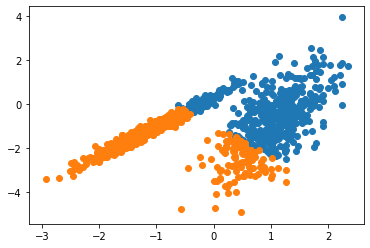

In [66]:
from sklearn.cluster import KMeans
from numpy import unique
# define the model
KM = KMeans(n_clusters=2)
# fit the model
KM.fit(X)
# assign a cluster to each example
yhat = KM.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Mini-Batch K-Means:
- modified version of k-means, computationally effcient in cost of deterioration in performance.
- MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small.
- makes updates to thefrom sklearn.cluster import MiniBatchKMeans
- Can make it faster for large datasets, and perhaps more robust to statistical noise

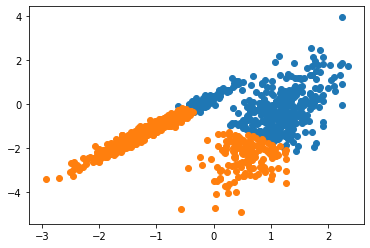

In [49]:
from sklearn.cluster import MiniBatchKMeans
# define the model
KM_min = MiniBatchKMeans(n_clusters=2)
# fit the model
KM_min.fit(X)
# assign a cluster to each example
yhat = KM_min.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

## Affinity Propagation:
The concept of "message passing" between data points.
Small number of exemplers ( as most representative of other samples) describe the data set. These exemplers are determined in an interative approach by sending messages (similarity, responsibility, and availability matrixes) between pair of data points   

- the clusters are determined based on the data, so no need to define the number of clusters (it is controled undirectly by sample preference parameter). 
- metric used:
  - Graph distance (e.g. nearest-neighbor graph). graph distance: The minimum length of the paths connecting two nodes. 
- Application:
  - Many clusters
  - uneven cluster size,
  - non-flat geometry
- drawback: 
  - The complexity, -----> appropriate for small to medium sized datasets.
- Parameters:
  - sample preference : controls how many exemplars are used 
  - damping: damps the responsibility and availability messages to avoid numerical oscillations when updating these messages.


In [50]:
from sklearn.cluster import AffinityPropagation

C:\Users\avafa\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


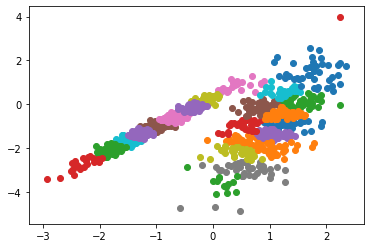

In [51]:
# define the model
af = AffinityPropagation(damping=0.9, preference= None)
# fit the model
af.fit(X)
# # assign a cluster to each example
yhat = af.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()


In [52]:
print("The exemplars: \n" ,af.cluster_centers_)

The exemplars: 
 [[ 1.22515974 -0.95173116]
 [ 0.63389285 -1.64812098]
 [ 1.53543025  0.16097692]
 [ 2.24510541  3.98122665]
 [ 1.04431493 -1.37020554]
 [-0.96839902 -1.01548925]
 [-0.70631056 -0.55506475]
 [ 0.63583616 -2.93979367]
 [ 0.50035212 -2.20970263]
 [-1.45737283 -1.66782737]
 [ 1.77073525  1.95064874]
 [ 1.07765338 -2.01567664]
 [ 0.26414717 -3.63338112]
 [ 0.55437192 -1.02509207]
 [-1.26633345 -1.36339242]
 [ 0.81819429 -0.11002969]
 [ 0.3813787   0.85784598]
 [ 0.02620621 -4.71323682]
 [-0.1388707   0.22785778]
 [ 1.24649725  0.60348734]
 [ 1.78634277  1.13915356]
 [ 1.2156718  -0.48212636]
 [-1.81569072 -2.05643547]
 [-2.22839983 -2.73476969]
 [-0.34511684 -0.13250031]]


In [53]:
print("The exemplars' indexes : \n", af.cluster_centers_indices_)

The exemplars' indexes : 
 [  0  44  95 148 213 232 377 392 399 413 417 494 561 574 618 660 712 718
 768 809 812 841 873 885 983]


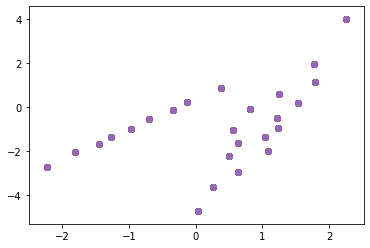

In [54]:
for cluster in clusters:
	# get row indexes for samples with this cluster
	exempler_ix = af.cluster_centers_indices_
	# create scatter of these samples
	pyplot.scatter(X[exempler_ix, 0], X[exempler_ix, 1])
# show the plot
pyplot.show()

In [55]:
Labels = af.labels_
print("each data point's label:\n", Labels[0:5] )

each data point's label:
 [ 0 11  1 11 19]


In [56]:
Aff_matrix = af.affinity_matrix_
print("This matrix shows the similarity of each data point with others\nit is a square matrix and the entries are <=0\nshowing log probability closer to 0 means more similarity")
print("As seen here data point's similarity with itself is 0 (log prob = 0 i.e. prob = 1)",Aff_matrix[0,0] )
print("The similarity of first data point with second is:{} and first data point with third data pointis:{}, so first\nand second are more similar.".format(Aff_matrix[0,1],Aff_matrix[0,2]))

This matrix shows the similarity of each data point with others
it is a square matrix and the entries are <=0
showing log probability closer to 0 means more similarity
As seen here data point's similarity with itself is 0 (log prob = 0 i.e. prob = 1) -0.0
The similarity of first data point with second is:-0.6418363300084784 and first data point with third data pointis:-1.3895621910623408, so first
and second are more similar.


## Mean Shift: (Mode-seeking algorithm)
- assigns the data points to the clusters iteratively by shifting points towards the mode 
- mode is the highest density of data points in the region, in the context of the Mean shift
- mean-shift does not require specifying the number of clusters in advance. 
- The number of clusters is determined by the algorithm with respect to the data.
- Mean-shift builds upon the concept of kernel density estimation (KDE)
- KDE is a method to estimate the underlying distribution also called the probability density function for a set of data.
  - It works by placing a kernel on each point in the data set. 
  - A kernel is a fancy mathematical word for a weighting function generally used in convolution. 
  - There are many different types of kernels, but the most popular one is the Gaussian kernel. Adding up all of the individual kernels generates a probability surface            example density function. 
  - Depending on the kernel bandwidth parameter used, the resultant density function will vary.

The concept is choosing an arbitrary window (circle) then find the center of garvity within circle (center of mass within circle). mean shift vector is a vector that takes the center of window toward center of mass i.e. moving the circle toward high density areas. 
In algorithms instead of windows, we place kernels on data points and estimate the pdf, accordingly. As a result we can find the high density areas (modes). The kernel's bandwidth is like the window's size in mean shift concept.  

Steps of algorithm:
1. Initialize random seed and window W.
2. Calculate the center of gravity (mean) of W.    
3. Shift the search window to the mean.    
4. Repeat Step 2 until convergence.

- advantagees:
  - Finds variable number of modes
  - Robust to outliers
  - General, application-independent tool
  - Model-free, doesn’t assume any prior shape like spherical, elliptical, etc. on data clusters
  - Just a single parameter (window size h) where h has a physical meaning (unlike k-means)
  
- disadvantages:
  - Output depends on window size
  - Window size (bandwidth) selecHon is not trivial
  - Computationally (relatively) expensive (approx 2s/image)
  - Doesn’t scale well with dimension of feature space.

- metric used:
  - Distances between points
- Applications:
  - Many clusters, uneven cluster size, non-flat geometry  

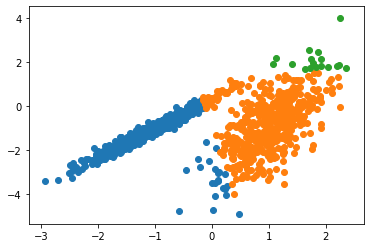

In [57]:
# mn_features_in_ean shift clustering
from sklearn.cluster import MeanShift

# define the model
MS = MeanShift(bandwidth = None)
# fit model and predict clusters
yhat = MS.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Spectral clustering:

#### Deatiled mathematical explanation:
https://www.youtube.com/watch?v=zLuVrqlYKyg&list=PLHXZdjnADb1Q6ol2UEuPMnXpQY-KzCmBy

- It treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem.

fundamental Steps:

- 1) Building the Similarity Graph: (Adjacency matrix that can be built in the following manners) 
  - Epsilon-neighbourhood Graph  
  - K-Nearest Neighbours
  - Fully-Connected Graph

- 2) Projecting the data onto a lower Dimensional Space: 
- In given dimensional space, the members of same cluster may be far away, so the dimensional space is reduced so that those points are closer in the reduced dimensional space and thus can be clustered together by a traditional clustering algorithm.
- We use Graph Laplacian Matrix.

  - (laplacian = Degree - Adjacency) for the graph with number of nodes = number of data points. 
  - Adjacency matrix: entries binary, 1 if there is an edge between a pair of node, 0 otherwise. aii  = 0
  - Adjacency matrix is a symmetric matrix, and eigenvectors are real and orthogonal
  - Degree matrix: a diagonal matrix, where entiries on main diagonal is the degree of that node.
  - Laplacian Matrix: degree matrix - adjacency matrix, where:
   - Eigenvalues are non-negative real numbers
   - Eigenvectors are real and orthogonal

- 3) Clustering the Data:
  - clustering the reduced data by using any traditional clustering technique – typically K-Means Clustering


In summary:
 The eigenvectors of laplacian matrix for data points considered as graph, partition the graph into clusters.
 The set of eigenvalues for such matrix is called the spectrum of that matrix. 
The eigenvector associated with 2nd and 3rd smallest eigenvalues, cuts the graph into two, and three clusters, respectively.
When we set the number of clusters  = 2 in fact the problem is finding the second smallest eigen value.

- Application: Few clusters, even cluster size, non-flat geometry

- metric used: Graph distance



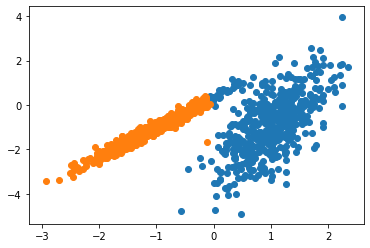

In [58]:
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define the model
SPC = SpectralClustering(2, affinity ='rbf')


# fit model and predict clusters
yhat = SPC.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## Hierarchical clustering:
- a method of cluster analysis which seeks to build a hierarchy of clusters(tree type structure based on the hierarchy).
- Two strategies of hierarchical clusterng:
  - Agglomerative Clustering (bottom up approach) merging the data points (only considers neighbour points, hence local patterns)
  - Devisive: (top-down approach) splitting the data points (takes into consideration the global distribution of data, hence more accuarate and more complex)
- Devisive is more complex
- Devisive is more efficient if we do not want to generate a complete hierarchy all the way down to individual data leaves.
- Divisive algorithm is also more accurate. 
  - Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These  early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.

- Hierarchical clustering is a connectivity based algorithm where variations are distinguished based on  
  - The linkage criteria 
  - Distance function

- The linkage criteria: 
  - Ward : minimizes the sum of squared differences within all clusters (with this criteria it is like k-mean clustering in a hirarchical way)
  - Maximum or complete linkage: minimizes the maximum distance between observations of pairs of clusters
  - Average linkage: minimizes the average of the distances between all observations of pairs of clusters.
  - Single linkage: minimizes the distance between the closest observations of pairs of clusters. 

- Disadvantages:
  - not robust against outliers: either makes them additional cluster, or even worse cause other clusters to merge against outliers(chaining phenomenan).
  - it is old and obsolete. 


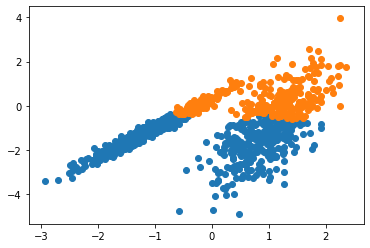

In [59]:
from sklearn.cluster import AgglomerativeClustering
# define the model
Agg = AgglomerativeClustering(n_clusters=2, linkage="complete")
# fit model and predict clusters
yhat = Agg.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

#### DBSACAN: (Density-Based Spatial Clustering of Applications with Noise)
- Clusters are dense regions in the data space, separated by regions of the lower density of points.
- The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”
- The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.
- DBSCAN algorithm requires two parameters 
  - eps: The radius around a data point
  - min points: min number of data points in radius eps of any datum.  
- In this algorithm, we have 3 types of data points:
- Core Point: A point is a core point if it has more than MinPts points within eps.
- Border Point:A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
- Noise or outlier: A point which is not a core point or border point.
- Applications:
  - Non-flat geometry, uneven cluster sizes
- metric: 
  - Distances between nearest points

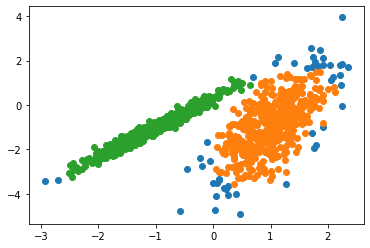

In [60]:
from sklearn.cluster import DBSCAN
# define the model
DB = DBSCAN(eps=0.3, min_samples=9)
# fit model and predict clusters
yhat = DB.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

## OPTICS: (Ordering Points To Identify Cluster Structure)
- adds two more conditions on top of DBSCAN algorithm (i.e. eps, and min_number_points):
  - Core Distance: It is the minimum value of radius required to classify a given point as a core point.If the given point is not a Core point, then it’s Core Distance is undefined.  
  - Reachability Distance: It is defined with respect to another data point q(Let). The Reachability distance between a point p and q is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q. Note that The Reachability Distance is not defined if q is not a Core point.
  
- The reachability distances generated by OPTICS allow for variable density extraction of clusters within a single data set.  
- combining reachability distances and data set ordering_ produces a reachability plot, where point density is represented on the Y-axis, and points are ordered such that nearby points are adjacent. 
- Reachability plot in sklearn documentation
- OPTICS Clustering v/s DBSCAN Clustering: 
  - more memory and more computational power
  - Fewer Parameters: not need to maintain the epsilon parameter, so reduction of the analytical process of parameter tuning.
  - This technique does not segregate the given data into clusters.It merely produces a Reachability distance plot. 

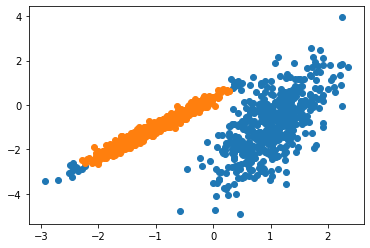

In [61]:
from sklearn.cluster import OPTICS
# define dataset

# define the model
OPT = OPTICS(eps=0.8, min_samples=50)            
# fit model and predict clusters
yhat = OPT.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### BIRCH: (Balanced Iterative Reducing and Clustering using Hierarchies)
- is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. 

Parameters:
- threshold :  
threshold is the maximum number of data points a sub-cluster in the leaf node of the CF tree can hold.
- branching_factor :
This parameter specifies the maximum number of CF sub-clusters in each node (internal node).
- n_clusters :
The number of clusters to be returned after the entire BIRCH algorithm is complete i.e., number of clusters after the final clustering step. If set to None, the final clustering step is not performed and intermediate clusters are returned.

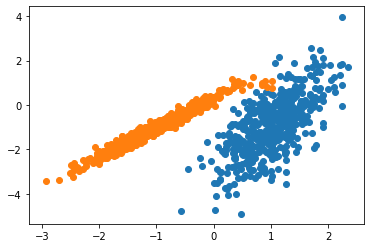

In [62]:
from sklearn.cluster import Birch
# define the model
Bir = Birch(threshold=0.01, n_clusters=2)
# fit the model
Bir.fit(X)
# assign a cluster to each example
yhat = Bir.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

#### Gaussian Mixture Model: 
-  assumes that the clusters come from different Gaussian Distributions. Or in other words, it is tried to model the dataset as a mixture of several Gaussian Distributions.
- Gaussian Mixture Models are probabilistic models and use the soft clustering approach for distributing the points in different clusters.
- Expectation-Maximization (EM) is a statistical algorithm for finding the right model parameters. We typically use EM when the data has missing values, or in other words, when the data is incomplete.
- The risk of overfitting


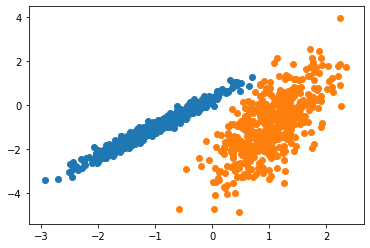

In [63]:
from sklearn.mixture import GaussianMixture

# define the model
GS = GaussianMixture(n_components=2)
# fit the model
GS.fit(X)
# assign a cluster to each example
yhat = GS.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

In this case, we can see that the clusters were identified perfectly.
This is not surprising given that the dataset was generated as a mixture of Gaussians.